<a href="https://colab.research.google.com/github/ishita164/DataAnalytics/blob/Experiments/2019130039_Part(I)_OEIT6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ISE 1: Exploratory Data Analysis**

**Objective:**

        Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs.

DataSet:

 Daily Age Group Outcomes- Daily case outcomes by age group (2/25/2022 - 4/9/2020)

https://www.tn.gov/content/dam/tn/health/documents/cedep/novel-coronavirus/datasets/Public-Dataset-Daily-Age-Group-Outcomes.XLSX

In this Dataset, there is data of total tests done, total cases found, totally recovered, total hospitals, and total deaths on a particular day.

It contains the data from 2/26/2022 to 4/9/2020.


# **Implemenation:**

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import scipy.stats as st
from statistics import mode
import numpy as np

data = pd.read_csv('/content/Public-Dataset-Daily-Age-Group-Outcomes.csv')
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries, 0 to 7172
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      7163 non-null   object 
 1   AGE_GROUP                 7173 non-null   object 
 2   TOTAL_TESTS               7173 non-null   int64  
 3   TOTAL_CASES               7173 non-null   int64  
 4   TOTAL_HOSP                7173 non-null   int64  
 5   TOTAL_INACTIVE_RECOVERED  7173 non-null   int64  
 6   TOTAL_DEATHS              6870 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 392.4+ KB


7173

In [2]:
data.head()

,DATE,AGE_GROUP,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
0,2/26/2022,0-10 years,1161182,181740,406,180318,NaN
1,2/26/2022,11-20 years,1589753,283545,668,282225,NaN
2,2/26/2022,21-30 years,2210672,352201,1666,350000,NaN
3,2/26/2022,31-40 years,1898498,318278,3057,315884,NaN
4,2/26/2022,41-50 years,1651440,285337,5152,282160,NaN


In [3]:
data.tail()

,DATE,AGE_GROUP,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
7168,NaN,51-60 years,0,0,0,634,NaN
7169,NaN,61-70 years,0,0,0,534,NaN
7170,NaN,71-80 years,0,0,0,374,NaN
7171,NaN,81+ years,0,0,0,217,NaN
7172,NaN,Pending,0,0,0,2,NaN


In [4]:
data.shape

(7173, 7)

                In this dataset, there are 1949 rows and 11 columns. It was retrived using data.shape.

In [5]:
data.nunique()

DATE                         717
AGE_GROUP                     10
TOTAL_TESTS                 6624
TOTAL_CASES                 6429
TOTAL_HOSP                  3737
TOTAL_INACTIVE_RECOVERED    6442
TOTAL_DEATHS                2136
dtype: int64

.nunique() helps to find number of unique elements in the object. Like in this dataset there are 166 unique country names are present.

In [6]:
data.isnull()

,DATE,AGE_GROUP,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
7168,True,False,False,False,False,False,True
7169,True,False,False,False,False,False,True
7170,True,False,False,False,False,False,True
7171,True,False,False,False,False,False,True


In [7]:
data.isnull().sum()

DATE                         10
AGE_GROUP                     0
TOTAL_TESTS                   0
TOTAL_CASES                   0
TOTAL_HOSP                    0
TOTAL_INACTIVE_RECOVERED      0
TOTAL_DEATHS                303
dtype: int64

          .isnull() helps to find missing values in the given series object and .notnull() helps to find existing values in the dataset

Removing missing values



Dropping rows with at least 1 null value

In [8]:
#any: if any NA values are present, drop that label
data.dropna(how = 'any', inplace = True )

In [9]:
data.shape

(6870, 7)

Null values adversely affect the performance and accuracy of any machine learning algorithm. Therefore using dropna() function, remove rows and columns with Null/NaN values. 

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(6870, 7)

In [13]:
data.head

<bound method NDFrame.head of            DATE    AGE_GROUP  TOTAL_TESTS  TOTAL_CASES  TOTAL_HOSP  \
10    2/25/2022   0-10 years      1159238       181684         406   
11    2/25/2022  11-20 years      1588124       283474         668   
12    2/25/2022  21-30 years      2209635       352091        1666   
13    2/25/2022  31-40 years      1897440       318186        3057   
14    2/25/2022  41-50 years      1650415       285237        5152   
...         ...          ...          ...          ...         ...   
6885   4/9/2020  51-60 years        27063          865         175   
6886   4/9/2020  61-70 years        17733          586         190   
6887   4/9/2020  71-80 years         8912          296         149   
6888   4/9/2020    81+ years         5142          157         103   
6889   4/9/2020      Pending           62            3           0   

      TOTAL_INACTIVE_RECOVERED  TOTAL_DEATHS  
10                      180148          15.0  
11                      282091     

In [14]:
o_data=data

## **Grouping**

In [15]:
grp1 = data.groupby(['AGE_GROUP']).sum()
grp1

,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
AGE_GROUP,,,,,
0-10 years,330625018,34053902,121276,32613968,3634.0
11-20 years,576788524,68744142,237430,66409690,4549.0
21-30 years,899358117,90171687,629461,87218657,39621.0
31-40 years,771230556,78858758,1115541,76164834,104978.0
41-50 years,681988050,73105041,1882082,70555840,284584.0
51-60 years,664835306,67193063,2916204,64475897,684994.0
61-70 years,496157920,47287274,3667236,44595148,1300330.0
71-80 years,291468129,27146273,3584468,24349437,1956392.0
81+ years,200256314,13499730,2471804,10752748,2271689.0


    Grouping is done to find out total tests, cases, recovered, and death in a particular age group.
    More Cases are found in the 21-30 age group followed by the 31-40 and 41-50 age groups. 


In [16]:
grp2 = data.groupby(['DATE','AGE_GROUP']).sum()
grp2

TOTAL_TESTS  TOTAL_CASES  TOTAL_HOSP  \
DATE     AGE_GROUP                                           
1/1/2021 0-10 years        396659        30191         138   
         11-20 years       831576        75575         296   
         21-30 years      1344527       108561         795   
         31-40 years      1134803        92580        1326   
         41-50 years      1006346        88805        2322   
...                           ...          ...         ...   
9/9/2021 51-60 years      1229057       148087        6517   
         61-70 years       918395       103888        8001   
         71-80 years       539694        59476        7705   
         81+ years         359974        29123        5229   
         Pending            36032         1184           3   

                      TOTAL_INACTIVE_RECOVERED  TOTAL_DEATHS  
DATE     AGE_GROUP                                            
1/1/2021 0-10 years                      27947           4.0  
         11-20 years                     70099           3.0  
         21-30 years                     98981          41.0  
         31-40 years                     83889          71.0  
         41-50 years                     80259         230.0  
...                                        ...           ...  
9/9/2021 51-60 years                    139811        1346.0  
         61-70 years                     96553        2688.0  
         71-80 years                     52451        4148.0  
         81+ years                       22984        4843.0  
         Pending                          1164           0.0  

[6870 rows x 5 columns]

In [17]:
i=data[data["DATE"]=='1/1/2022']
data1=data[:560]
data1.shape
data1.tail()

,DATE,AGE_GROUP,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
565,1/1/2022,51-60 years,1443848,187742,7893,175097,2636.0
566,1/1/2022,61-70 years,1089040,131397,9738,121085,4304.0
567,1/1/2022,71-80 years,640689,74535,9179,65896,5782.0
568,1/1/2022,81+ years,406732,35309,6170,27957,6274.0
569,1/1/2022,Pending,36724,1427,3,1414,0.0


In [18]:
grp3 = data1.groupby(['AGE_GROUP']).sum()
grp3

,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
AGE_GROUP,,,,,
0-10 years,60495221,8742116,21663,8020871,624.0
11-20 years,84831184,14344453,36975,13503202,1192.0
21-30 years,119636840,17945654,92510,16796758,9989.0
31-40 years,102340208,16065361,169860,14996163,27975.0
41-50 years,88928126,14394689,286451,13418647,71117.0
51-60 years,85849920,13004121,454053,12041022,161331.0
61-70 years,64608750,8954030,566654,8166417,263328.0
71-80 years,37918834,4990999,540549,4367338,348090.0
81+ years,23764570,2324864,366685,1830535,376425.0


        Grouping is done for recent data to find out total tests, cases, recovered and death in particaular age group.
        More Cases are found in 21-30 age group followed by 31-40, 41-50 and 11-20 age group.  

# **summarize data**

The Measures of location are the mean, median, and mode. 


In [19]:
print("Mean \t\t Original \t\t Recent")
print("TOTAL_TESTS:",o_data['TOTAL_TESTS'].mean(),"\t",data1['TOTAL_TESTS'].mean())
print("TOTAL_CASES:",data['TOTAL_CASES'].mean(),"\t",data1['TOTAL_CASES'].mean())
print("INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].mean(),"\t",data1['TOTAL_INACTIVE_RECOVERED'].mean())
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].mean(),"\t",data1['TOTAL_DEATHS'].mean())


Mean 		 Original 		 Recent
TOTAL_TESTS: 717551.2672489083 	 1197223.9803571429
TOTAL_CASES: 72868.63944687045 	 180093.80714285714
INACTIVE_RECOVERED: 69531.6310043668 	 166473.66607142857
TOTAL_DEATHS: 968.0965065502184 	 2250.1267857142857


Mean is the average of the values. Here, the result tells that the total test that takes place for covid recently is more than before, which implies people are really more aware than in past. Also, as the rate of covid patients is decreased now, the total cases and death also decrease. And the recovery rate is increased. 

In [20]:
print("Median")
print("TOTAL_TESTS:",data['TOTAL_TESTS'].median())
print("TOTAL_CASES:",data['TOTAL_CASES'].median())
print("TOTAL_INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].median())
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].median())

Median
TOTAL_TESTS: 638056.5
TOTAL_CASES: 46629.5
TOTAL_INACTIVE_RECOVERED: 43879.0
TOTAL_DEATHS: 117.0


Median gives the middle number in an ordered data set.

In [21]:
print("Mode:")
print("TOTAL_TESTS:",data['TOTAL_TESTS'].mode())
print("TOTAL_CASES:",data['TOTAL_CASES'].mode())
print("TOTAL_INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].mode())
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].mode())

Mode:
TOTAL_TESTS: 0    30057
dtype: int64
TOTAL_CASES: 0    1403
dtype: int64
TOTAL_INACTIVE_RECOVERED: 0    1038
dtype: int64
TOTAL_DEATHS: 0    0.0
dtype: float64


The mode gives the most frequent value. 

In [22]:
print("Variance")
print("TOTAL_TESTS:",data['TOTAL_TESTS'].var())
print("TOTAL_CASES:",data['TOTAL_CASES'].var())
print("TOTAL_INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].var())
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].var())

Variance
TOTAL_TESTS: 278907846400.57214
TOTAL_CASES: 5533016368.579405
TOTAL_INACTIVE_RECOVERED: 5164907031.4814
TOTAL_DEATHS: 2609109.5057528247


In [23]:
print("SD:")
print("TOTAL_TESTS:",data['TOTAL_TESTS'].std())
print("TOTAL_CASES:",data['TOTAL_CASES'].std())
print("TOTAL_INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].std())
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].std())

SD:
TOTAL_TESTS: 528117.2657663941
TOTAL_CASES: 74384.24812135567
TOTAL_INACTIVE_RECOVERED: 71867.2876313097
TOTAL_DEATHS: 1615.2738175779439


A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. Here, the SD is high which indicates data are more spread out. 


In [24]:
print("SE:")
print("TOTAL_TESTS:",data['TOTAL_TESTS'].std()/(len(data))**1/2)
print("TOTAL_CASES:",data['TOTAL_CASES'].std()/(len(data))**1/2)
print("TOTAL_INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].std()/(len(data))**1/2)
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].std()/(len(data))**1/2)

SE:
TOTAL_TESTS: 38.43648222462839
TOTAL_CASES: 5.413700736634328
TOTAL_INACTIVE_RECOVERED: 5.230515839251069
TOTAL_DEATHS: 0.11755995761120407


The standard error tells you how much the sample means would vary if you were to repeat a study using new samples from within a single population. Here, Total tests have a high standard error which shows that sample means are widely spread around the population mean whereas total cases, inactive recovered and deaths have a low standard error which shows that sample means are closely distributed around the population mean.

In [25]:
print("Coefficient of Variation:")
print("TOTAL_TESTS:",data['TOTAL_TESTS'].std()/data['TOTAL_TESTS'].mean())
print("TOTAL_CASES:",data['TOTAL_CASES'].std()/data['TOTAL_CASES'].mean())
print("TOTAL_INACTIVE_RECOVERED:",data['TOTAL_INACTIVE_RECOVERED'].std()/data['TOTAL_INACTIVE_RECOVERED'].mean())
print("TOTAL_DEATHS:",data['TOTAL_DEATHS'].std()/data['TOTAL_DEATHS'].mean())

Coefficient of Variation:
TOTAL_TESTS: 0.7359993492746459
TOTAL_CASES: 1.020799189966903
TOTAL_INACTIVE_RECOVERED: 1.0335912820281203
TOTAL_DEATHS: 1.6685049544636017


As the coefficient of variation is low for total tests, cases, recovered and deaths, the smaller the level of dispersion around the mean.

In [26]:
print("Range of Total Cases: ",min(data['TOTAL_CASES']),"-",max(data['TOTAL_CASES']))

Range of Total Cases:  3 - 352091


In [27]:
print("Q2 quantile of arr : ", np.quantile(data['TOTAL_DEATHS'], .50))
print("Q1 quantile of arr : ", np.quantile(data['TOTAL_DEATHS'], .25))
print("Q3 quantile of arr : ", np.quantile(data['TOTAL_DEATHS'], .75))
print("100th quantile of arr : ", np.quantile(data['TOTAL_DEATHS'], .1))

Q2 quantile of arr :  117.0
Q1 quantile of arr :  5.0
Q3 quantile of arr :  1111.0
100th quantile of arr :  0.0


The first quartile or Q1 is the value in the data set such that 25% of the data points are less than 5 and 75% of the data set is greater than 5. Similarly, for Q2 it is 5, Q3: 1111, and Q4: 0.


In [28]:
print("50th percentile of arr : ",np.percentile(data['TOTAL_DEATHS'], 50))
print("25th percentile of arr : ",np.percentile(data['TOTAL_DEATHS'], 25))
print("75th percentile of arr : ",np.percentile(data['TOTAL_DEATHS'], 75))

50th percentile of arr :  117.0
25th percentile of arr :  5.0
75th percentile of arr :  1111.0


The 25th percentile is the value at which 75% of the answers lie above 5 and 25% of the answers lie below 5. The 50th percentile of Total Deaths tells that 50 percent of the time total death will be below 117. The 75th percentile is the value at which 25% of the answers lie above 1111 and 75% of the answers lie below 1111.

In [29]:
#create 95% confidence interval for population mean weight
print("Original Data")
print("TOTAL_TESTS: ",st.t.interval(alpha=0.95, df=len(data['TOTAL_TESTS'])-1, loc=np.mean(data['TOTAL_TESTS']), scale=st.sem(data['TOTAL_TESTS'])) )
print("TOTAL_CASES: ",st.t.interval(alpha=0.95, df=len(data['TOTAL_CASES'])-1, loc=np.mean(data['TOTAL_CASES']), scale=st.sem(data['TOTAL_CASES'])) )
print("TOTAL_INACTIVE_RECOVERED: ",st.t.interval(alpha=0.95, df=len(data['TOTAL_INACTIVE_RECOVERED'])-1, loc=np.mean(data['TOTAL_INACTIVE_RECOVERED']), scale=st.sem(data['TOTAL_INACTIVE_RECOVERED'])) )
print("TOTAL_DEATHS: ",st.t.interval(alpha=0.95, df=len(data['TOTAL_DEATHS'])-1, loc=np.mean(data['TOTAL_DEATHS']), scale=st.sem(data['TOTAL_DEATHS'])) )

print("\nRecent Data")
print("TOTAL_TESTS: ",st.t.interval(alpha=0.95, df=len(data1['TOTAL_TESTS'])-1, loc=np.mean(data1['TOTAL_TESTS']), scale=st.sem(data1['TOTAL_TESTS'])) )
print("TOTAL_CASES: ",st.t.interval(alpha=0.95, df=len(data1['TOTAL_CASES'])-1, loc=np.mean(data1['TOTAL_CASES']), scale=st.sem(data1['TOTAL_CASES'])) )
print("TOTAL_INACTIVE_RECOVERED: ",st.t.interval(alpha=0.95, df=len(data1['TOTAL_INACTIVE_RECOVERED'])-1, loc=np.mean(data1['TOTAL_INACTIVE_RECOVERED']), scale=st.sem(data1['TOTAL_INACTIVE_RECOVERED'])) )
print("TOTAL_DEATHS: ",st.t.interval(alpha=0.95, df=len(data1['TOTAL_DEATHS'])-1, loc=np.mean(data1['TOTAL_DEATHS']), scale=st.sem(data1['TOTAL_DEATHS'])) )

Original Data
TOTAL_TESTS:  (705060.8593660564, 730041.6751317602)
TOTAL_CASES:  (71109.3907736677, 74627.8881200732)
TOTAL_INACTIVE_RECOVERED:  (67831.91051776875, 71231.35149096487)
TOTAL_DEATHS:  (929.8939516786945, 1006.2990614217422)

Recent Data
TOTAL_TESTS:  (1145380.8104774102, 1249067.1502368755)
TOTAL_CASES:  (171367.74685759106, 188819.86742812322)
TOTAL_INACTIVE_RECOVERED:  (158093.12442526844, 174854.2077175887)
TOTAL_DEATHS:  (2037.0616687672195, 2463.191902661352)


For Original Data:

The interpretation of a 95% confidence interval is that "we are 95% confident that the total tests are between 705060.8593660564 and 730041.6751317602". For Total Cases,  it is between 71109.3907736677 and 74627.8881200732, for total recovered is between 67831.91051776875 and 71231.35149096487; for total deaths, it is between 929.8939516786945 and 1006.2990614217422. 

For Recent Data:

The interpretation of a 95% confidence interval is that "we are 95% confident that the total tests are between 1145380.8104774102 and 1249067.1502368755". For Total Cases,  it is between 171367.74685759106 and 188819.86742812322, for total recovered is between 158093.12442526844 and 174854.2077175887; for total deaths, it is between 2037.0616687672195 and 2463.191902661352. 



# **Different graphs**

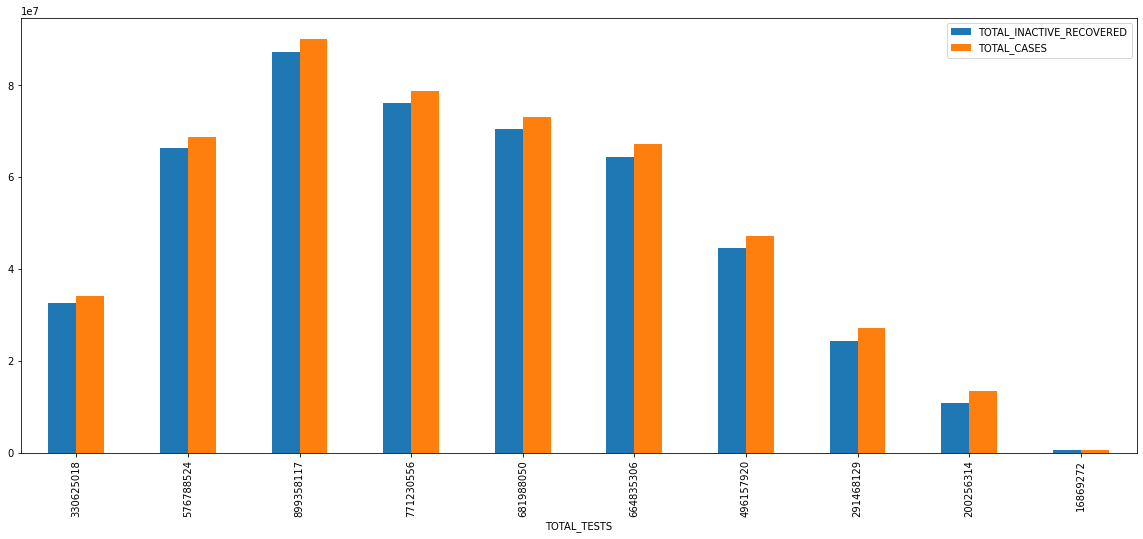

In [30]:
grp1.plot(x="TOTAL_TESTS", y=["TOTAL_INACTIVE_RECOVERED", "TOTAL_CASES"], kind="bar", figsize=(20, 8))


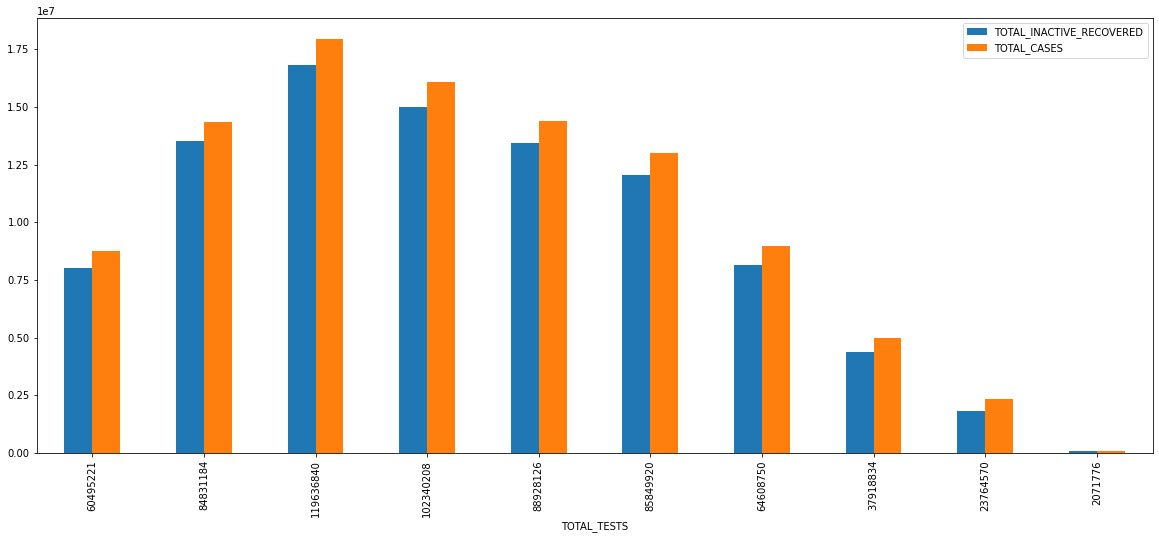

In [31]:
grp3.plot(x="TOTAL_TESTS", y=["TOTAL_INACTIVE_RECOVERED", "TOTAL_CASES"], kind="bar", figsize=(20, 8))


Bar graphs are ideal for comparing two or more values, or values over time. 
Fig 1: Original Data
Fig2: Recent Data
Fig 1 and 2 is the comparison between recovered and total cases found. Here we can observe that the difference is very low. This implies cases were found daily, but the recovery rate is also good.



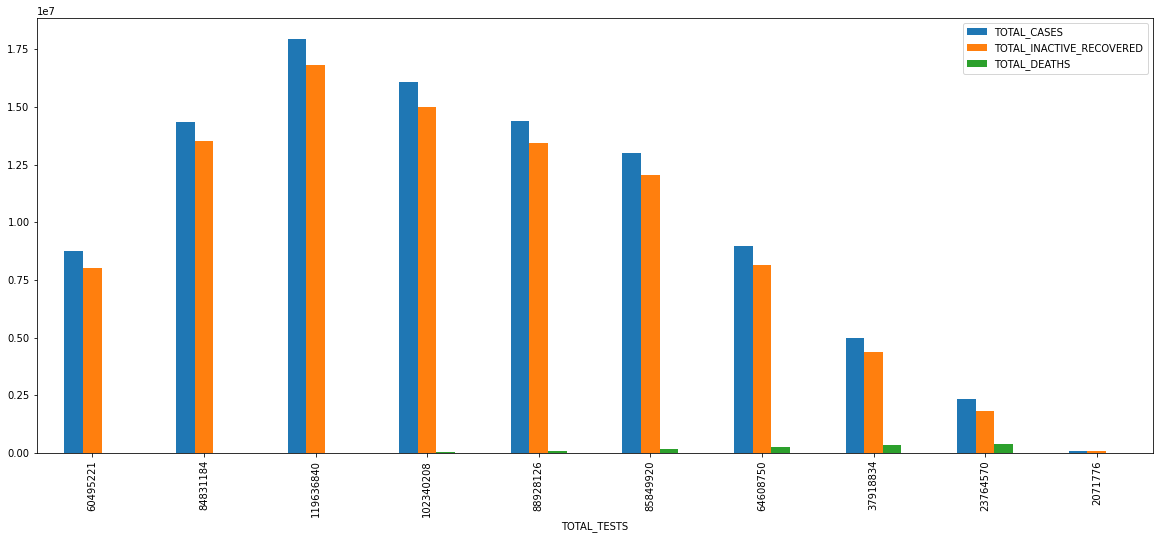

In [32]:
grp3.plot(x="TOTAL_TESTS", y=["TOTAL_CASES","TOTAL_INACTIVE_RECOVERED","TOTAL_DEATHS"], kind="bar", figsize=(20, 8))


Comparison between Total Cases, Recovery, and Deaths on the basis of a particular age group.
Total Cases found and recovery rate is high for the age group of 20-30 but the death rate is negligible. Whereas it is the opposite in the case of 70+ age.


In [33]:
# gra = data.drop(['Generosity','Perceptions of corruption','Positive affect','Negative affect'],axis=1)
gra =data1

In [34]:
gra.head()

,DATE,AGE_GROUP,TOTAL_TESTS,TOTAL_CASES,TOTAL_HOSP,TOTAL_INACTIVE_RECOVERED,TOTAL_DEATHS
10,2/25/2022,0-10 years,1159238,181684,406,180148,15.0
11,2/25/2022,11-20 years,1588124,283474,668,282091,23.0
12,2/25/2022,21-30 years,2209635,352091,1666,349792,200.0
13,2/25/2022,31-40 years,1897440,318186,3057,315660,541.0
14,2/25/2022,41-50 years,1650415,285237,5152,281960,1362.0


In [35]:
corelation = gra.corr()

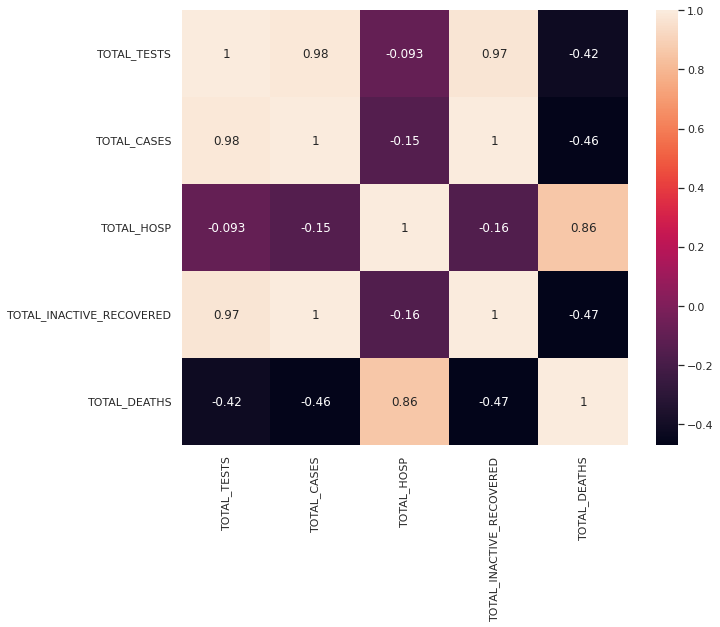

In [36]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

As the value of correlation, closer is to 1, for (cases, tests), (recovered, tests), (deaths, hosp) i.e 0.98,0.97,0.86; which implies stronger this relationship is.
A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.



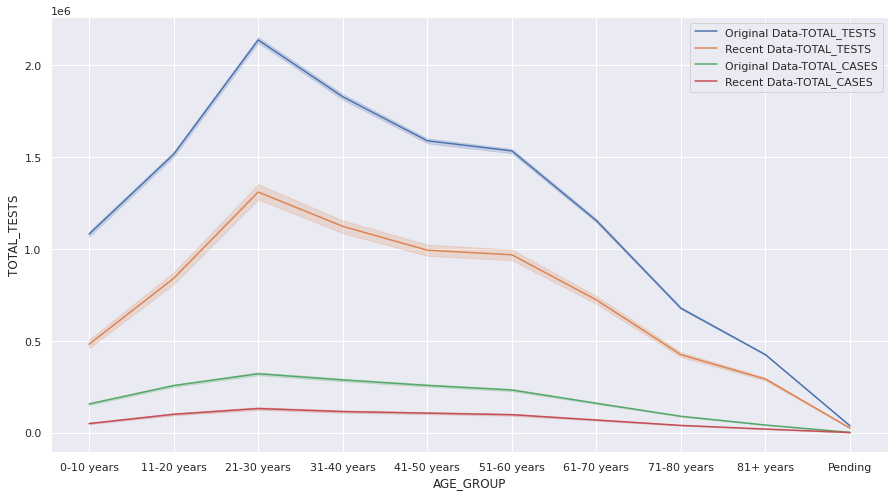

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=data1, x="AGE_GROUP", y="TOTAL_TESTS",label='Original Data-TOTAL_TESTS')
sns.lineplot(data=o_data, x="AGE_GROUP", y="TOTAL_TESTS",label='Recent Data-TOTAL_TESTS')
sns.lineplot(data=data1, x="AGE_GROUP", y="TOTAL_CASES",label='Original Data-TOTAL_CASES')
sns.lineplot(data=o_data, x="AGE_GROUP", y="TOTAL_CASES",label='Recent Data-TOTAL_CASES')

The number of Total tests done has been reduced than before for all age groups.
Similarly, the number of Total cases found has been reduced than before for all age groups except the 80+ age group.


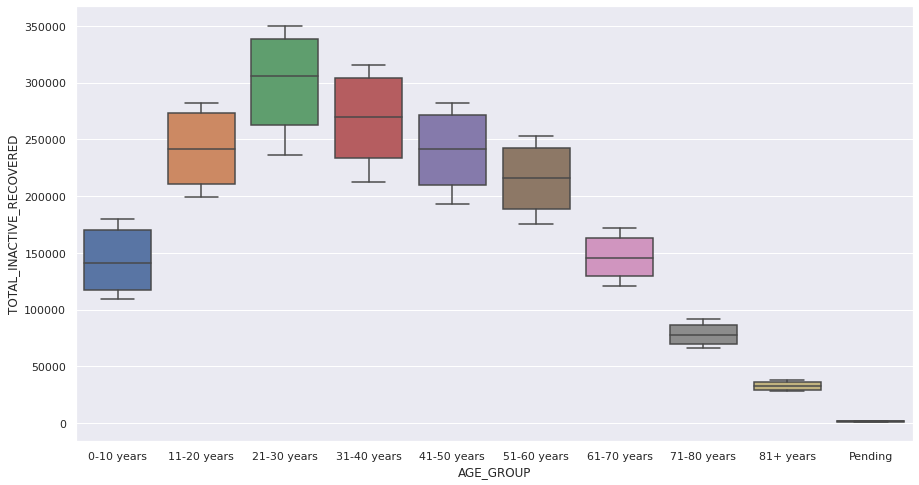

In [38]:
sns.boxplot(x=gra['AGE_GROUP'], y=gra['TOTAL_INACTIVE_RECOVERED'])

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

The recovery rate is high in the case of the 20-30 age group, whereas, it is low in the case of the 60+ age group.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


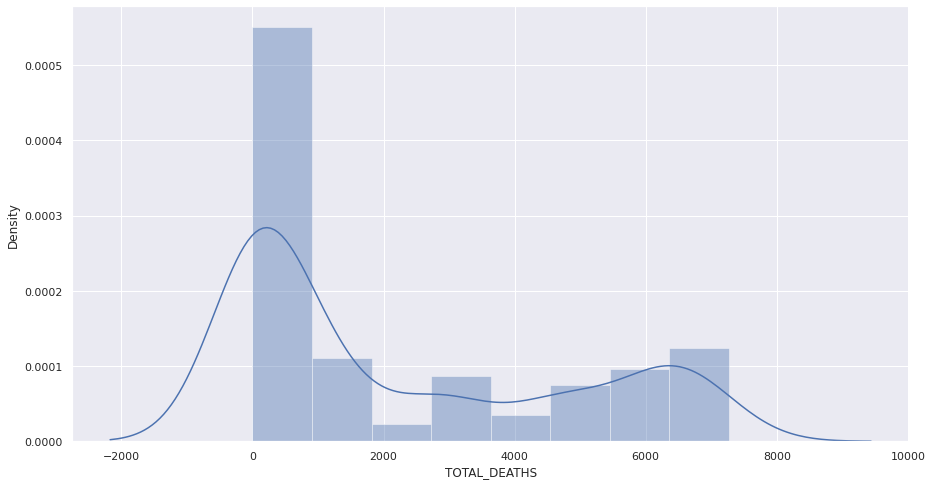

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(gra['TOTAL_DEATHS'],bins=8)

As in this Dist plot, the bar is high at 0-1000, which implies that the number of deaths occurring recently is less i.e. between 0 to 1000.

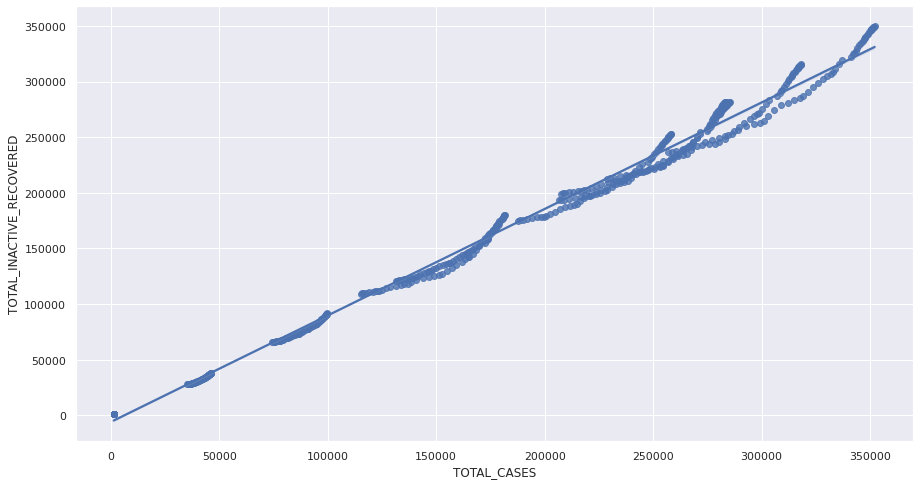

In [40]:
sns.regplot(x=data1['TOTAL_CASES'], y=data1['TOTAL_INACTIVE_RECOVERED'])

As in the Scatter plot, the total cases found and recovery rate is almost a straight line. So, we can say that the total cases found and recovery rate goes hand in hand. 



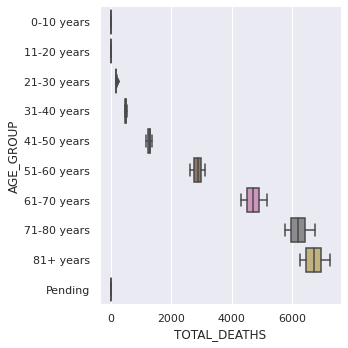

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(y='AGE_GROUP',x='TOTAL_DEATHS', kind='box', data=gra)

As in this Cat plot, shows frequencies is high for the 71+ age group, which implies that the number of deaths is high in this age group.



# **Inference:**


The Measures of location are the mean, median, and mode. 


*   Mean is the average of the values. Here, 
the result tells that the total test that takes place for covid recently is more than before, which implies people are really more aware than in past. Also, as the rate of covid patients is decreased now, the total cases and death also decrease. And the recovery rate is increased. 
*   Median gives the middle number in an ordered data set.
*   The mode gives the most frequent value. 

The Measures of spread are the standard deviation, standard error, variance, percentiles, range, and coefficient of variation


*   A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. Here, the SD is high which indicates data are more spread out.
*   The standard error tells you how much the sample means would vary if you were to repeat a study using new samples from within a single population. Here, Total tests have a high standard error which shows that sample means are widely spread around the population mean whereas total cases, inactive recovered and deaths have a low standard error which shows that sample means are closely distributed around the population mean
*   The 25th percentile is the value at which 75% of the answers lie above 5 and 25% of the answers lie below 5. The 50th percentile of Total Deaths tells that 50 percent of the time total death will be below 117. The 75th percentile is the value at which 25% of the answers lie above 1111 and 75% of the answers lie below 1111.
*  The first quartile or Q1 is the value in the data set such that 25% of the data points are less than 5 and 75% of the data set is greater than 5. Similarly, for Q2 it is 5, Q3: 1111, and Q4: 0.
*   As the coefficient of variation is low for total tests, cases, recovered and deaths, the smaller the level of dispersion around the mean.

For Original Data:

The interpretation of a 95% confidence interval is that "we are 95% confident that the total tests are between 705060.8593660564 and 730041.6751317602". For Total Cases,  it is between 71109.3907736677 and 74627.8881200732, for total recovered is between 67831.91051776875 and 71231.35149096487; for total deaths, it is between 929.8939516786945 and 1006.2990614217422. 

For Recent Data:

The interpretation of a 95% confidence interval is that "we are 95% confident that the total tests are between 1145380.8104774102 and 1249067.1502368755". For Total Cases,  it is between 171367.74685759106 and 188819.86742812322, for total recovered is between 158093.12442526844 and 174854.2077175887; for total deaths, it is between 2037.0616687672195 and 2463.191902661352. 



Graphs

 

*   Bar graphs are ideal for comparing two or more values, or values over time. 
Bar Graphs is the comparison between recovered and total cases found. Here we can observe that the difference is very low between total cases and recovered. This implies cases were found daily, but the recovery rate is also good.

*   Comparison between Total Cases, Recovery, and Deaths on the basis of a particular age group using bar graph. Total Cases found and recovery rate is high for the age group of 20-30 and the death rate is negligible. Whereas it is the opposite in the case of 70+ age.

*   As the value of correlation, closer is to 1, for (cases, tests), (recovered, tests), (deaths, hosp) i.e 0.98,0.97,0.86; which implies stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

*   The number of Total tests done has been reduced than before for all age groups. Similarly, the number of Total cases found has been reduced than before for all age groups except the 80+ age group.

*   A boxplot is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). The recovery rate is high in the case of the 20-30 age group, whereas, it is low in the case of the 60+ age group.

*   As in this Dist plot, the bar is high at 0-1000, which implies that the number of deaths occurring recently is less i.e. between 0 to 1000.

*   As in the Scatter plot, the total cases found and recovery rate is almost a straight line. So, we can say that the total cases found and recovery rate goes hand in hand. 

*   As in this Cat plot, shows frequencies is high for the 71+ age group, which implies that the number of deaths is high in this age group.



## **Conclusion**

  Total Number of Tests, Cases, Recovery rate and death cases are high in 21-30 and 31-40 age groups. Also, the recent data (1 Jan - 25 Feb) conclude that covid rate is less in this year than previous one.